# Data management

## Introduction to plotting with `matplotlib` and `seaborn`

## [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306](https://malkaguillot.github.io/ECON2206-Data-Management/)

## `matplotlib`
- why matplotlib
- the functional approach
- the object-oriented approach

#### Dataset used
- stocks-sp500
- qfrdata

### Why matplotlib?

`matplotlib` is the primary charting library of Python. It is a massive library, which offers so much, that it can easily become overwhelming. Creating a basic chart is fairly simple, but sometimes just a little customization already requires a deep dive into the API. 

One of the reasons we cover matplotlib here though is that many other libraries are also built on the matplotlib API, and  plotting charts directly from Pandas dataframes is easier if we have a basic understading of matplotlib's mechanics. There are other popular charting packages, such as `seaborn` or `Plotly`, but we think that a real Pythonista should be able to work with matplotlib objects.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

A good sumary of the hows and whys of matplotlib can be found here: [https://heartbeat.comet.ml/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39](https://heartbeat.comet.ml/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39). 

There are two ways of creating a matplotlib plot.

### The Functional Approach

In [2]:
x = range(0, 10)
y = [i ** 2 for i in x] # lists (list comprehension)
print(y)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


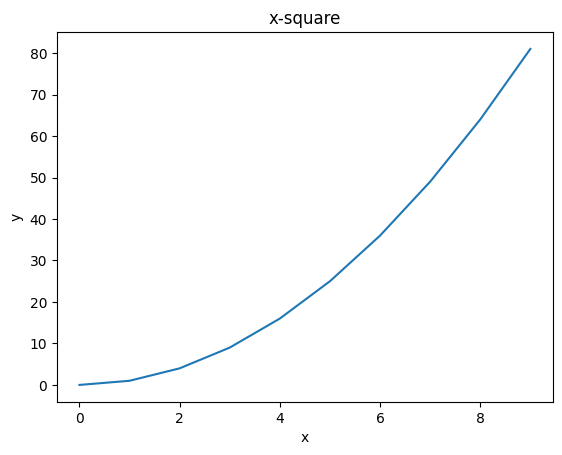

In [3]:
plt.plot(x,y)
plt.title('x-square')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

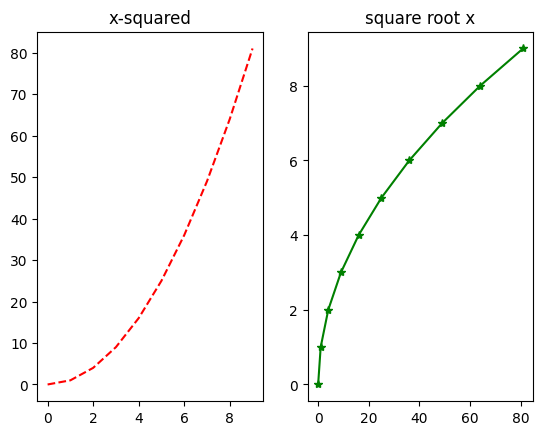

In [4]:
plt.subplot(1,2,1) # nrows, ncols, index of the next plot starting with index 1 from the top left and increasing to the right
plt.plot(x, y, 'r--') # 'r' stands for red, '--' stands for dash
plt.title('x-squared')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-')
plt.title('square root x');  # insted of plt.show() you can also use a semicolon to show the plot

Matplotlib color options can be found here: [https://matplotlib.org/stable/gallery/color/named_colors.html](https://matplotlib.org/stable/gallery/color/named_colors.html)

### The Object-oriented Approach

There are two key [components](https://files.realpython.com/media/fig_map.bc8c7cabd823.png) in a Plot; namely, `Figure` and `Axes`.

![](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

The `Figure` is the top-level container that acts as the window or page on which everything is drawn. It can contain multiple independent figures, or `Axes`, a subtitle (which is a centered title for the figure), a legend, a color bar, etc.

The `Axes` is the area on which we plot our data and any labels/ticks associated with it. Each Axes has an X-Axis and a Y-Axis

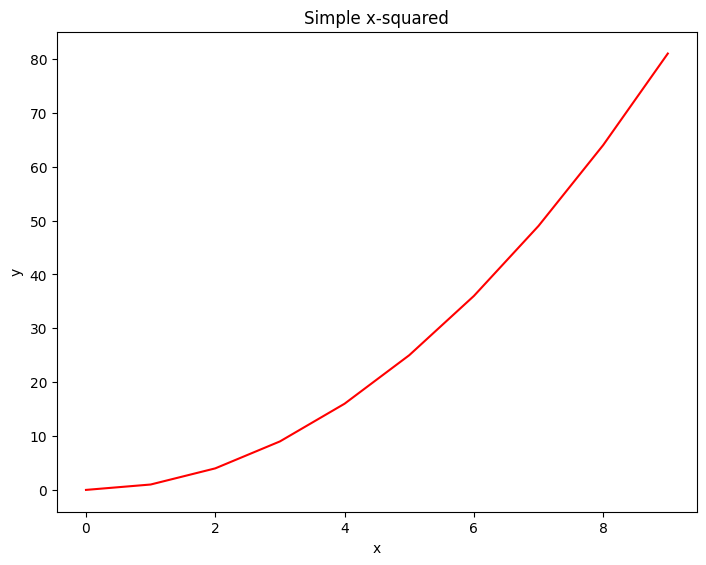

In [5]:
x = range(0, 10)
y = [i ** 2 for i in x]

fig = plt.figure()
axes = fig.add_axes([0, 0.1, 1, 1]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Simple x-squared');

We can do a plot within a plot.

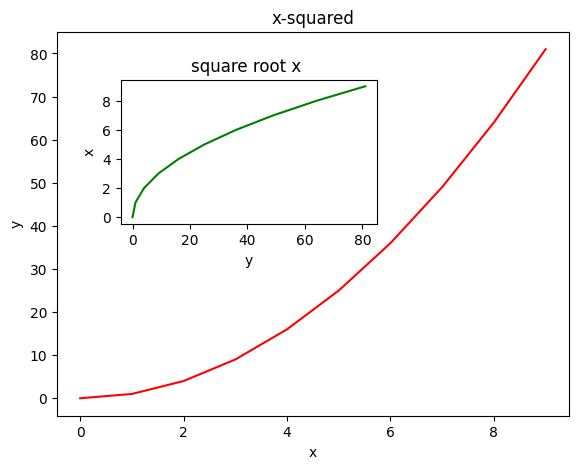

In [6]:
fig = plt.figure()

axes1 = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.1, 0.4, 0.4, 0.3]) # inset axes: left and bottom of the lower-left corner, width, height

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('x-squared')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('square root x ');

Let's do some stock market price discovery!

In [7]:
import pandas as pd # 
import numpy as np # 

In [8]:
df = pd.read_csv('https://osf.io/4pgrf/download') # url, path, 

In [9]:
df.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.10,15.17,11.497672,15.00,15.29,34994300.0
1,ACN,2001-07-20,15.05,15.01,11.376402,14.80,15.05,9238500.0
2,ACN,2001-07-23,15.00,15.00,11.368821,14.55,15.01,7501000.0
3,ACN,2001-07-24,14.95,14.86,11.262713,14.70,14.97,3537300.0
4,ACN,2001-07-25,14.70,14.95,11.330926,14.65,14.95,4208100.0


In [10]:
df.shape

(304859, 8)

In [11]:
df['ref.date'] = pd.to_datetime(df['ref.date']) # convert date

In [12]:
df['ticker'].unique()

array(['ACN', 'ADBE', 'AMD', 'AKAM', 'ADS', 'APH', 'ADI', 'ANSS', 'AAPL',
       'AMAT', 'ANET', 'ADSK', 'ADP', 'AVGO', 'BR', 'CDNS', 'CSCO',
       'CTXS', 'CTSH', 'GLW', 'DXC', 'FFIV', 'FIS', 'FISV', 'FLT', 'FLIR',
       'FTNT', 'IT', 'GPN', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'IPGP',
       'JKHY', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'LDOS', 'MA', 'MXIM',
       'MCHP', 'MU', 'MSFT', 'MSI', 'NTAP', 'NVDA', 'ORCL', 'PAYX',
       'PYPL', 'QRVO', 'QCOM', 'CRM', 'STX', 'SWKS', 'SYMC', 'SNPS',
       'TEL', 'TXN', 'TSS', 'VRSN', 'V', 'WDC', 'WU', 'XRX', 'XLNX'],
      dtype=object)

In [13]:
msft = df[df.ticker == 'MSFT'] # selecting microsoft stocks from df
msft.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
202259,MSFT,1997-12-29,15.296875,15.789063,10.192576,15.265625,15.843750,67815200.0
202260,MSFT,1997-12-30,15.804688,16.281250,10.510311,15.781250,16.375000,77864800.0
202261,MSFT,1997-12-31,16.375000,16.156250,10.429615,16.125000,16.437500,46147200.0
202262,MSFT,1998-01-02,16.203125,16.390625,10.580915,16.187500,16.437500,39748000.0
202263,MSFT,1998-01-05,16.406250,16.296875,10.520394,15.984375,16.703125,80377600.0


In [14]:
msft.shape

(5287, 8)

In [15]:
#list(msft['ref.date'])
#msft['price.close'].tolist()

In [16]:
# 2 ways to convert a Pandas column to list
date = list(msft['ref.date'])
price = msft['price.close'].tolist()

In [17]:
# 2 ways to convert a Pandas column to list
date = list(df[df.ticker == 'MSFT']['ref.date'])
price = df[df.ticker == 'MSFT']['price.close'].tolist()

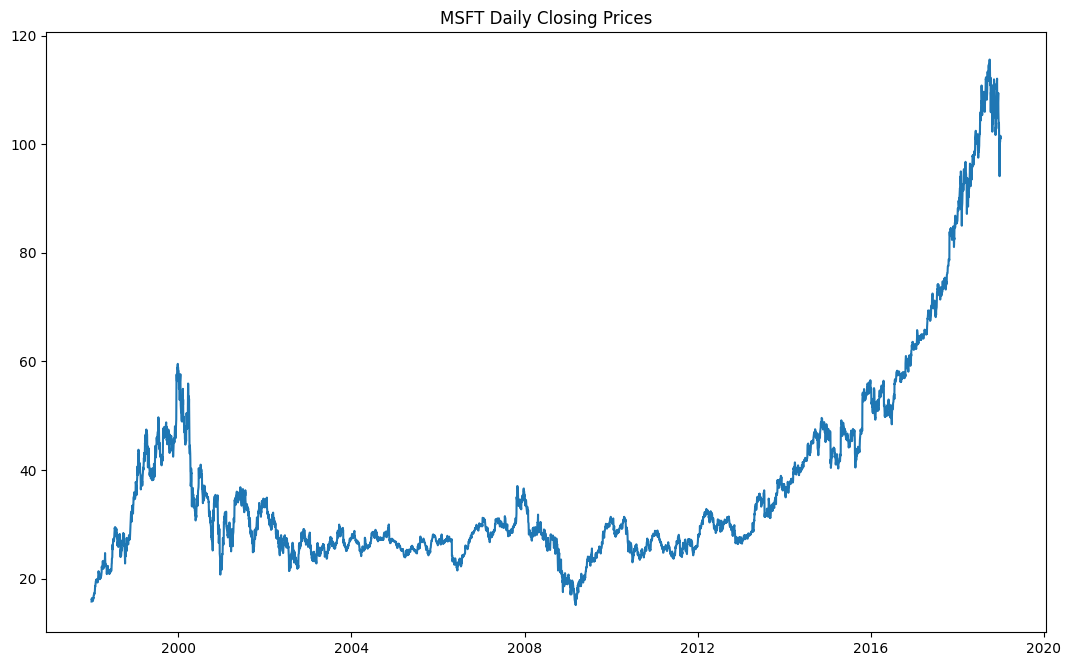

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Closing Prices')
ax.plot(date, price)
plt.show();

Adding additional chart elements.
- y-axis limits
- legends

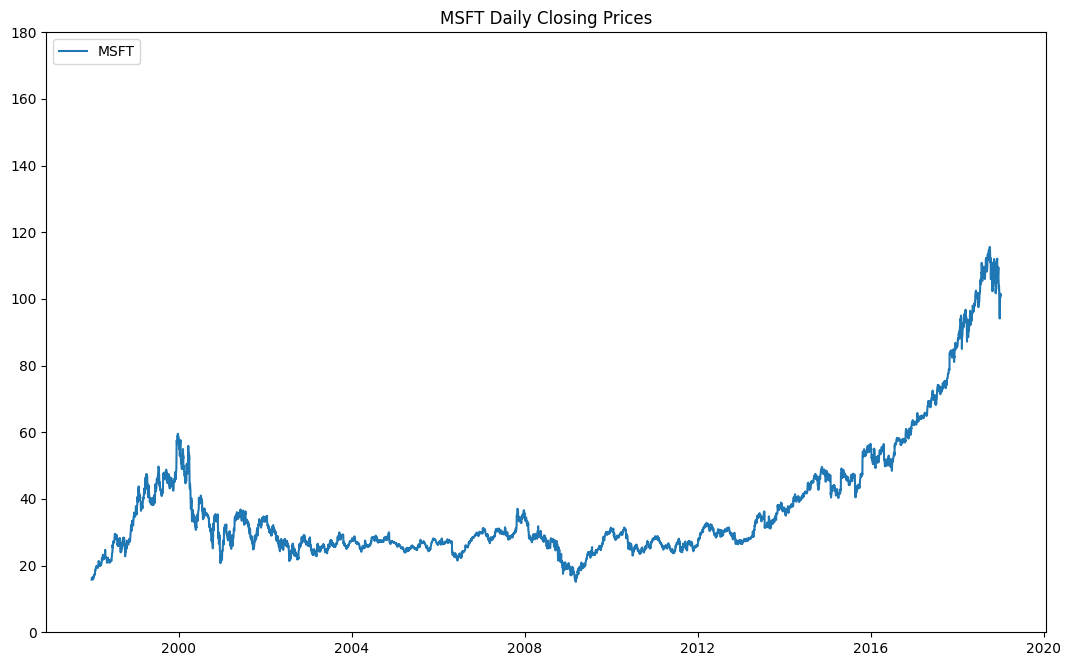

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Closing Prices')
ax.plot(date, price, label = 'MSFT')
plt.legend(loc = 'upper left')
ax.set_ylim(0,180)
plt.show();

- average line

In [20]:
meanprice = np.mean(price)
meanprice

37.29403605012294

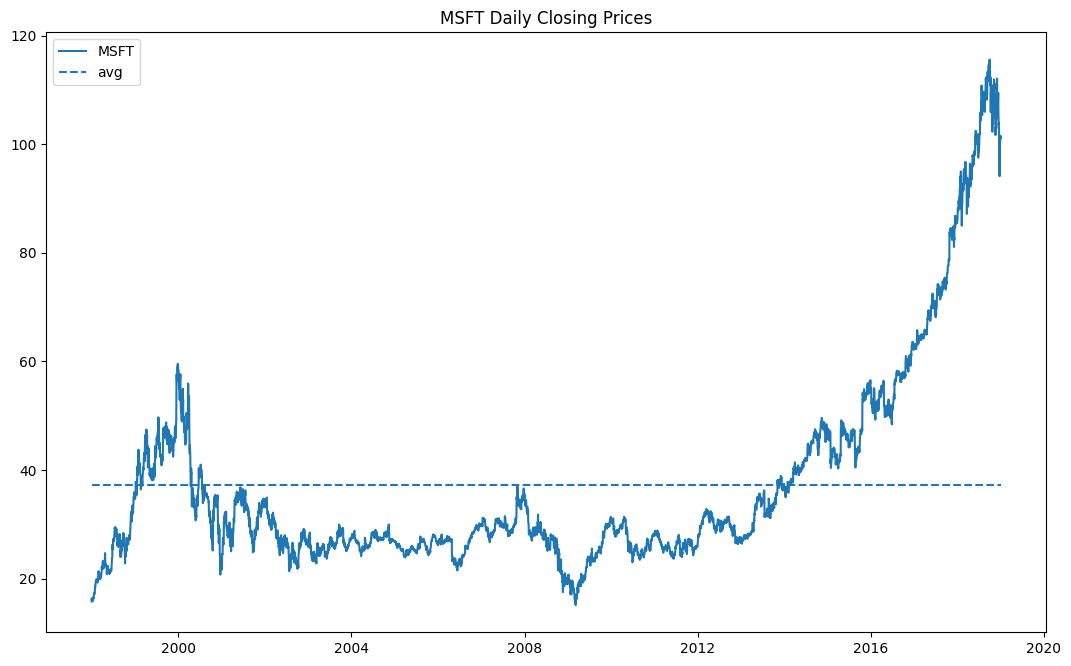

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Closing Prices')
ax.plot(date, price, label = 'MSFT')
ax.hlines(y = meanprice, xmin = date[0], xmax = date[-1], linestyle = '--', label = 'avg')
plt.legend(loc = 'upper left')
plt.show();

- log scale 

<Axes: >

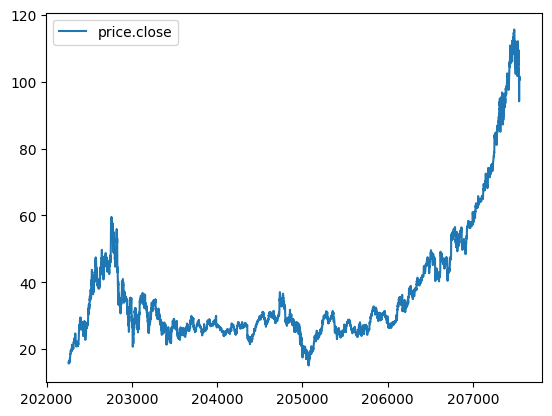

In [22]:
msft[['price.close']].plot()

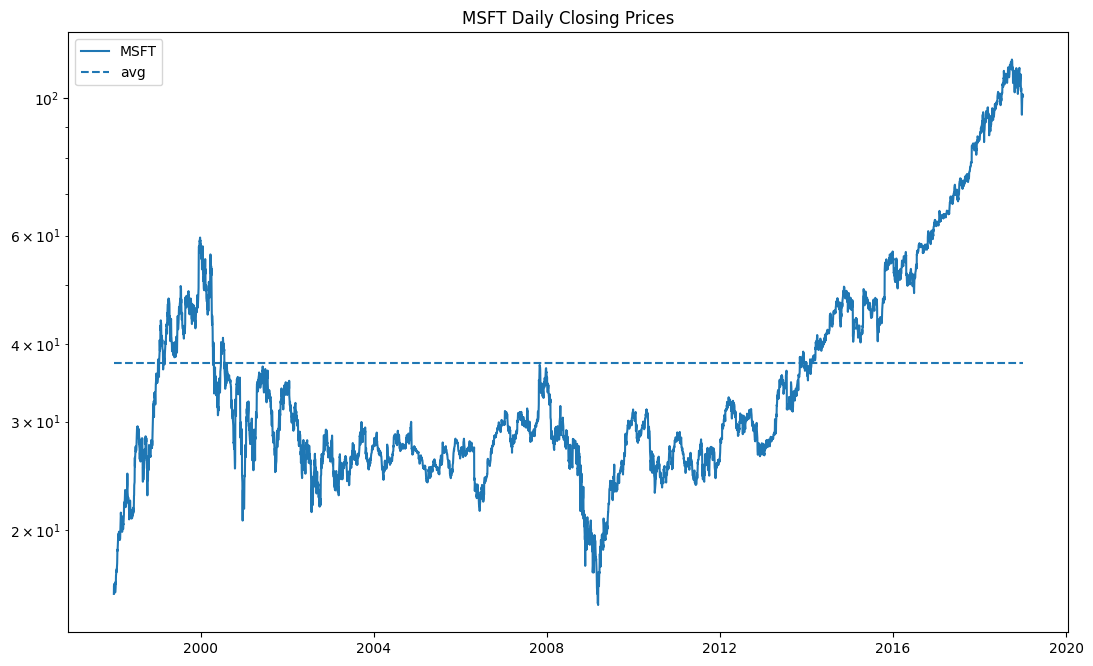

In [23]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Closing Prices')
ax.plot(date, price, label = 'MSFT')
ax.hlines(y = meanprice, xmin = date[0], xmax = date[-1], linestyle = '--', label = 'avg')
ax.set_yscale('log')
plt.legend(loc = 'upper left')
plt.show();

- plotting two time series of different scale &#8594; use a secondary axis

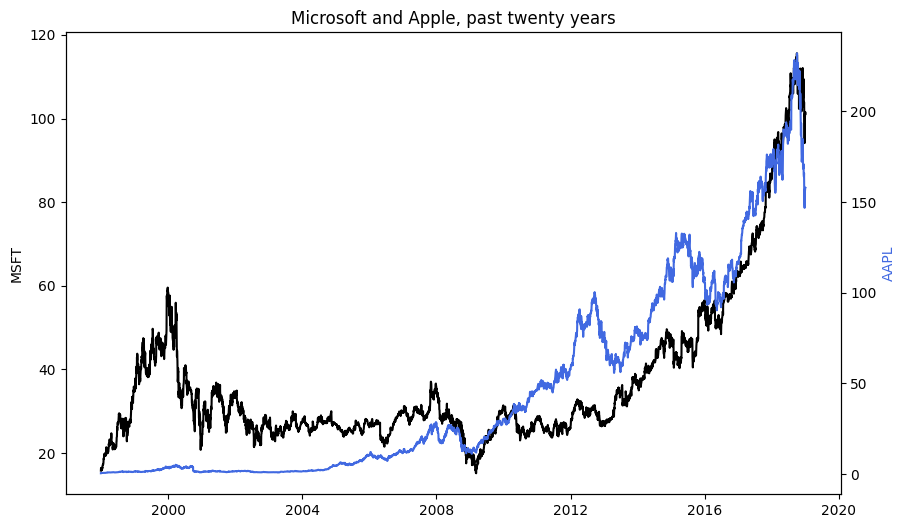

In [24]:
date = df[df.ticker == 'MSFT']['ref.date'].tolist()
price_msft = df[df.ticker == 'MSFT']['price.close'].tolist()
price_aapl = df[df.ticker == 'AAPL']['price.close'].tolist()


fig, ax1 = plt.subplots(figsize = (10,6))

ax1.plot(date, price_msft, color = 'k')
ax1.xaxis_date()
ax1.set_ylabel("MSFT", color = 'k')
ax2 = ax1.twinx()
ax2.plot(date, price_aapl, color = "royalblue")
ax2.set_ylabel("AAPL", color = "royalblue")
plt.title('Microsoft and Apple, past twenty years');

- histogram of daily price changes

In [25]:
df_msft = df[df.ticker == 'MSFT']
df_msft['pct_chg'] = df_msft['price.close'].pct_change(periods = 1)

In [26]:
df_msft.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume,pct_chg
202259,MSFT,1997-12-29,15.296875,15.789063,10.192576,15.265625,15.843750,67815200.0,NaN
202260,MSFT,1997-12-30,15.804688,16.281250,10.510311,15.781250,16.375000,77864800.0,0.031173
202261,MSFT,1997-12-31,16.375000,16.156250,10.429615,16.125000,16.437500,46147200.0,-0.007678
202262,MSFT,1998-01-02,16.203125,16.390625,10.580915,16.187500,16.437500,39748000.0,0.014507
202263,MSFT,1998-01-05,16.406250,16.296875,10.520394,15.984375,16.703125,80377600.0,-0.005720


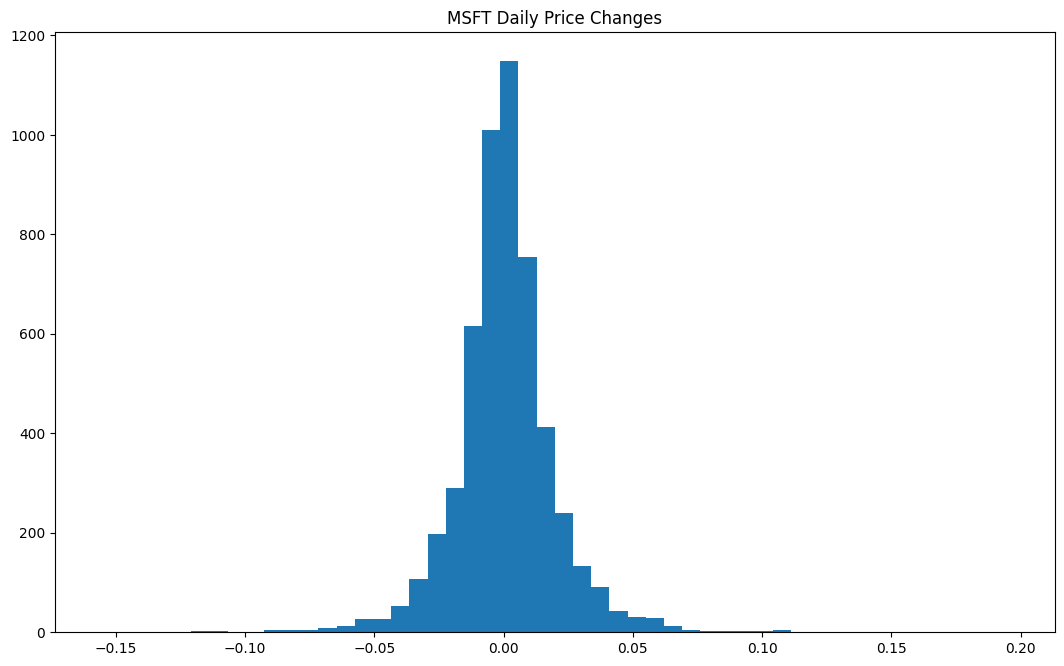

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Price Changes')
ax.hist(df_msft.pct_chg, bins = 50)

#plt.legend(loc = 'upper left')
plt.show();

- spacing between the bars + horizontal grids

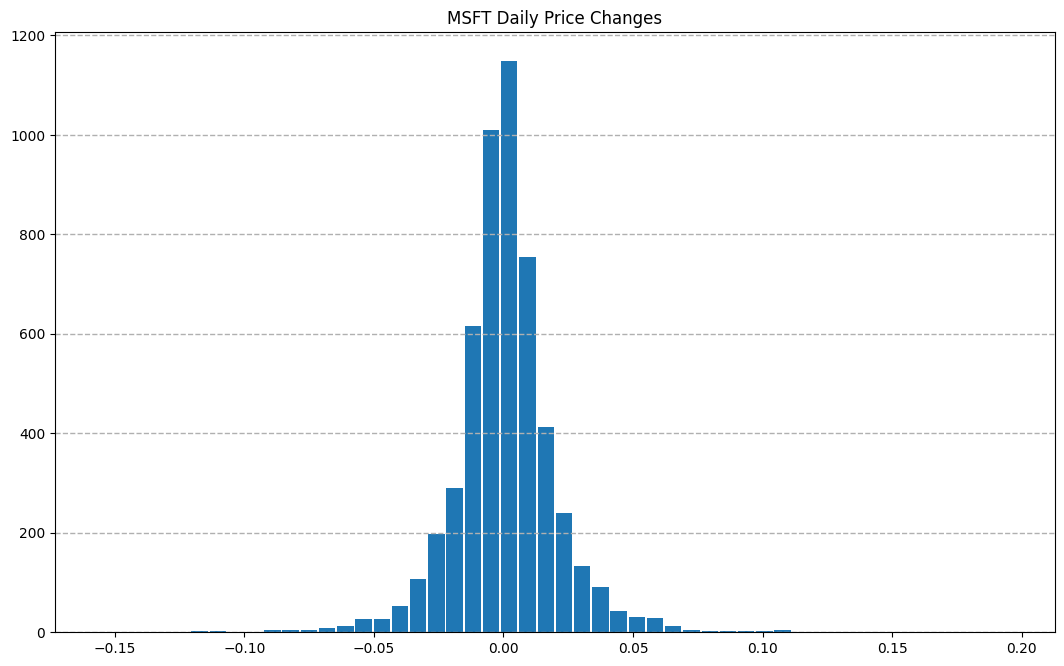

In [28]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.set_title('MSFT Daily Price Changes')
ax.hist(df_msft.pct_chg, bins = 50, rwidth = 0.9)
plt.grid(axis = 'y', linestyle='--', linewidth=1)
#plt.legend(loc = 'upper left')
plt.show();

- chart within a chart

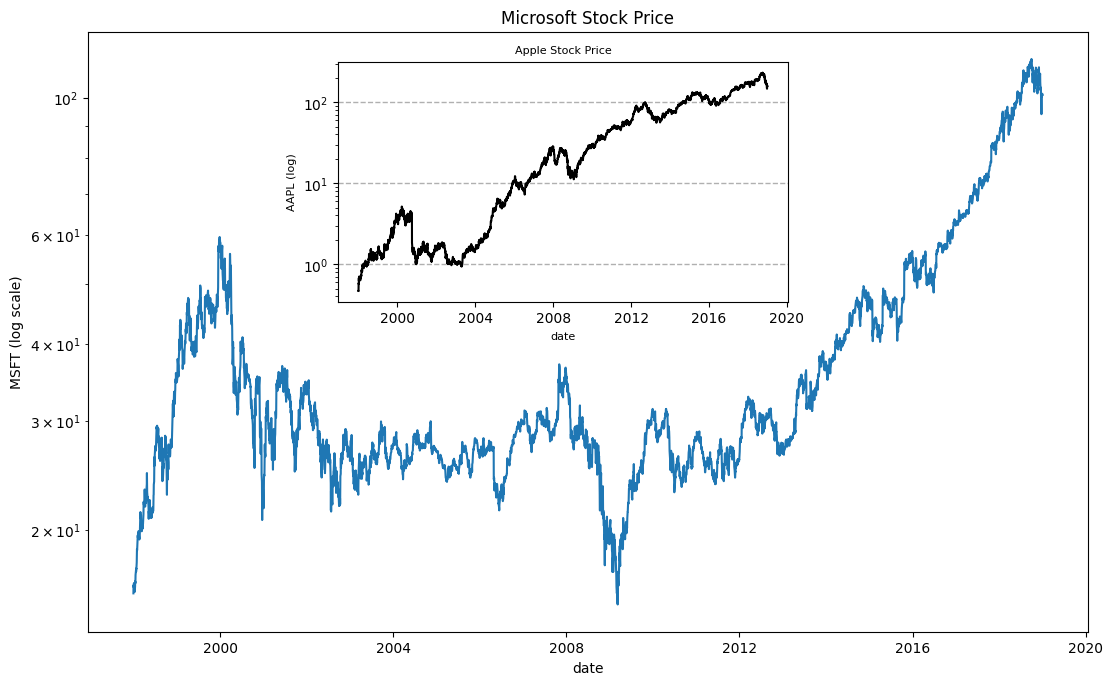

In [29]:
fig = plt.figure(figsize = (10,6))

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.25, 0.55, 0.45, 0.4]) # inset axes

# main figure
axes1.plot(date, price_msft)
axes1.set_xlabel('date')
axes1.set_ylabel('MSFT (log scale)')
axes1.set_yscale('log')
axes1.set_title('Microsoft Stock Price')

# insert
axes2.plot(date, price_aapl, color = 'black')
axes2.set_xlabel('date', fontsize = 8)
axes2.set_ylabel('AAPL (log)',  fontsize = 8)
axes2.set_yscale('log')
axes2.grid(axis = 'y', linestyle='--', linewidth=1)
axes2.set_title('Apple Stock Price', fontsize = 8);

Note that both price axes are quoted in scientific notation. It is kind of tricky to convert it into a easy-to-read format but not impossible. 

In [30]:
import matplotlib as mpl

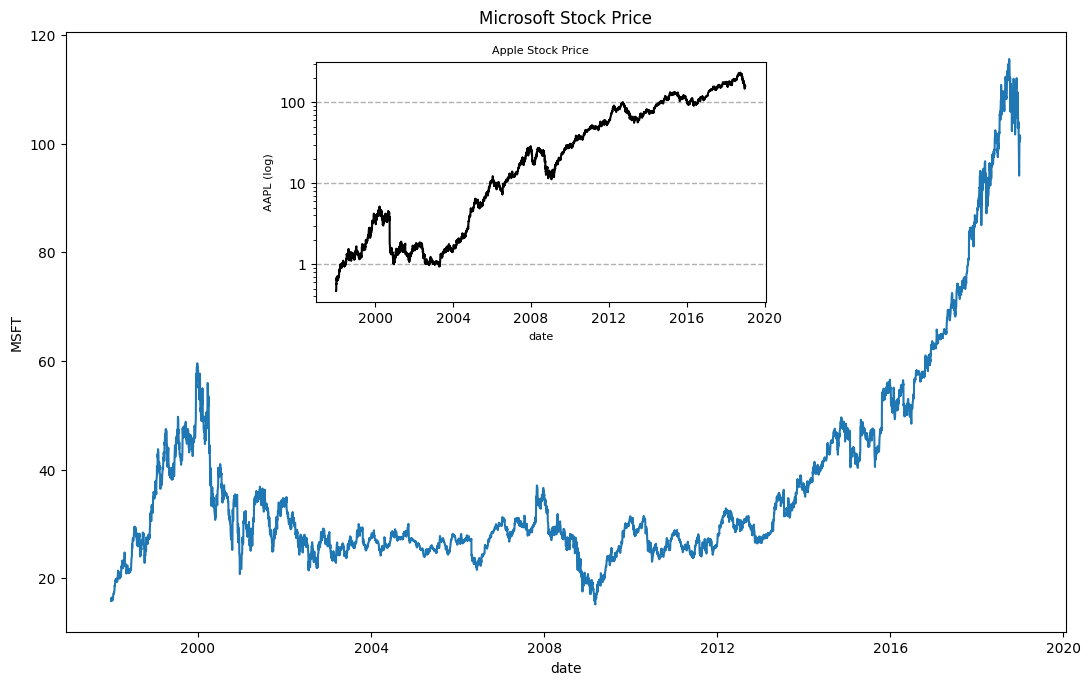

In [31]:
fig = plt.figure(figsize = (10,6))

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.25, 0.55, 0.45, 0.4]) # inset axes

# main figure
axes1.plot(date, price_msft)
axes1.set_xlabel('date')
axes1.set_ylabel('MSFT')
axes1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) # This line takes care of the number formatting. 
axes1.set_title('Microsoft Stock Price')

# insert
axes2.plot(date, price_aapl, color = 'black')
axes2.set_xlabel('date', fontsize = 8)
axes2.set_ylabel('AAPL (log)',  fontsize = 8)
axes2.set_yscale('log')
axes2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
axes2.grid(axis = 'y', linestyle='--', linewidth=1)
axes2.set_title('Apple Stock Price', fontsize = 8);

## `Seaborn`
Seaborn is a powerful Python library built on top of Matplotlib, specifically designed for creating attractive and informative statistical graphics. 


- Intuitive API
- Integration with Pandas: direct compatibility with pandas DataFrames 
- Style Customization: built-in themes, palettes, and customization options
- Statistical Visualizations

Standard syntax: 

`sns.function_name(data=your_data, x='column_name', y='column_name', ...)`

- `sns`: The standard alias used for the Seaborn library.
- `function_name`: A specific plot type (e.g., scatterplot, lineplot, boxplot).
- `data`: Specifies the DataFrame containing your data.
- `x` and `y`: Specify the columns for the x-axis and y-axis. These are typically column names from the DataFrame.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Load a built-in dataset
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Basic Plotting with Seaborn

### Histogram

- Displays the distribution of a numerical variable.
- `bins`: Controls the number of bins in the histogram.

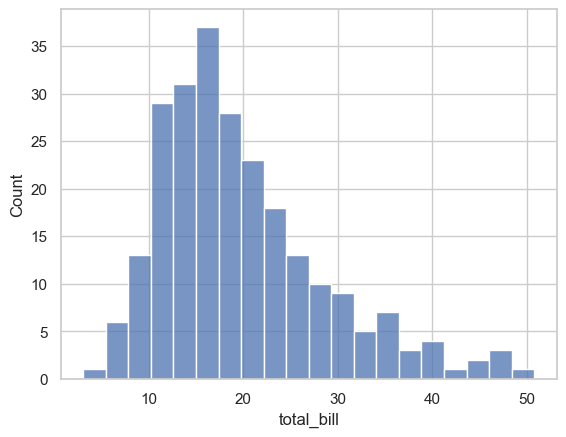

In [51]:
sns.histplot(data=data, x='total_bill', bins=20)
plt.show()

In [ ]:
sns.kdeplot(data=data, x='total_bill', fill=True)

In [ ]:
sns.kdeplot(data=data, x='total_bill', fill=True)

### Box plot
Visualizes the distribution of a dataset based on quartiles

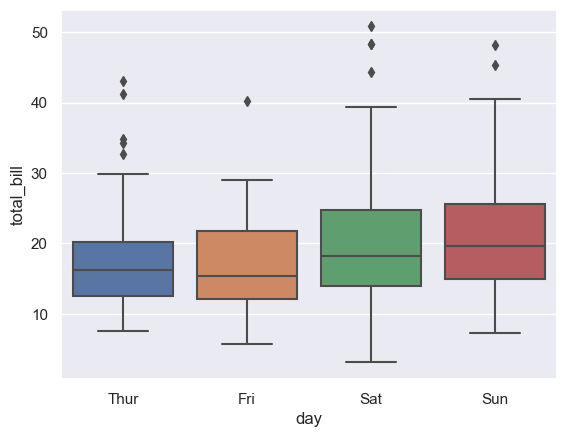

In [41]:
sns.boxplot(data=data, x='day', y='total_bill')
plt.show()

### Line Plot 
Ideal for showing trends over time or ordered data.

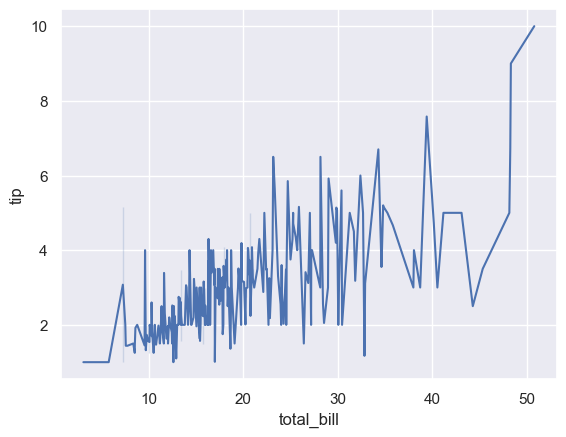

In [39]:
# Line Plot
sns.lineplot(data=data, x='total_bill', y='tip')
plt.show()

#### Scatter plot: 2 quantitative variables

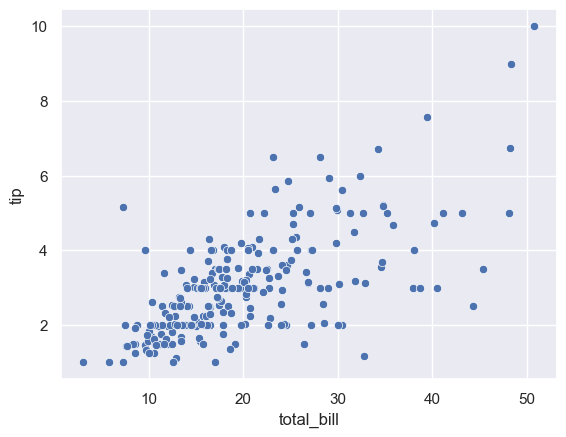

In [38]:
# Scatter Plot
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.show()

#### Bar Plot: quantitative vs. qualitative variables

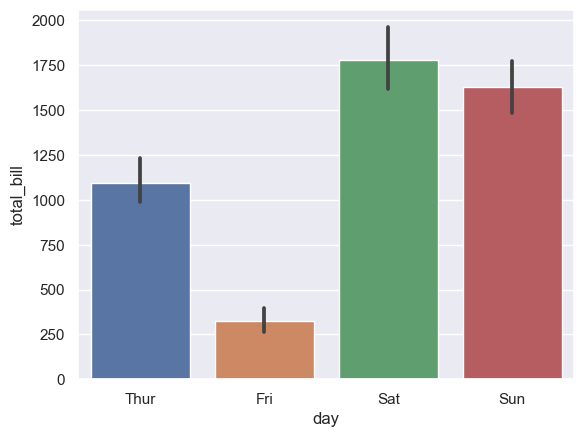

In [43]:
sns.barplot(data=data, x='day', y='total_bill', estimator=sum)
plt.show()

### Adding Aesthetic Elements

`Seaborn` makes it easy to add additional layers of information to a plot by using parameters like hue, style, size, and palette:

#### `hue`: Adds a third variable and maps it to color.

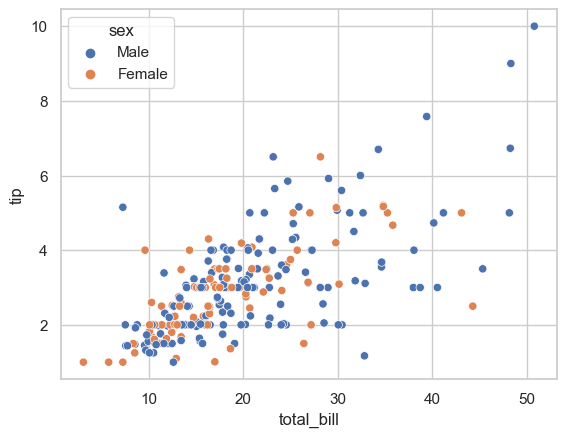

In [55]:
# Customizing Plots with Hue
sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex')
plt.show()

#### `style`: Changes the marker style based on another variable.

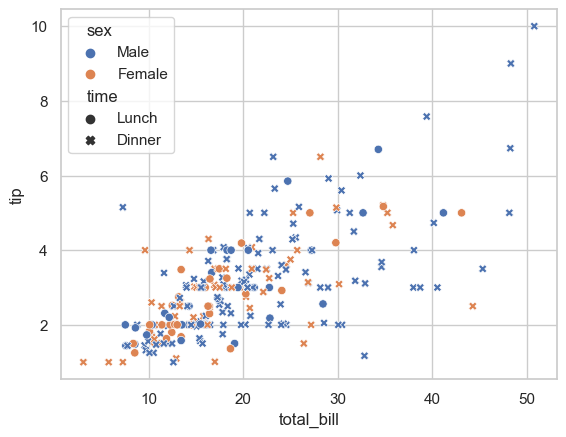

In [56]:
sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex', style='time')
plt.show()

Each category in time is represented by a different marker style.

#### `size`: Adjusts the size of the markers.

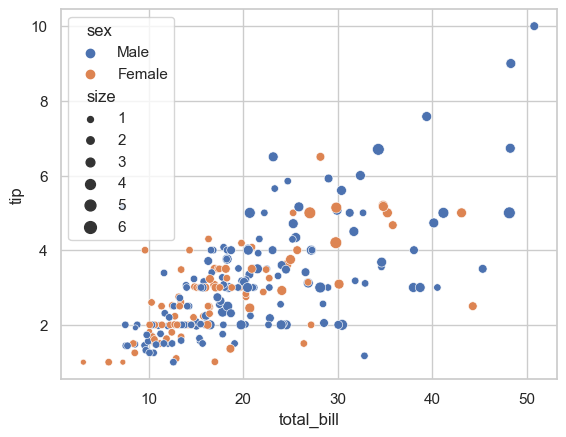

In [57]:
# Customizing Plots with Hue, Size, and Palette
sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex', size='size')
plt.show()

#### `palette`: Customizes the color palette.

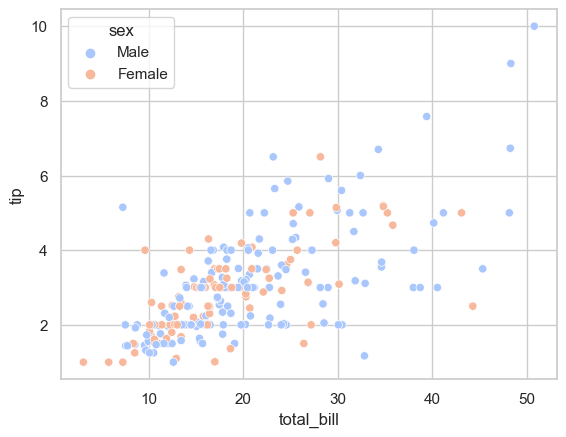

In [60]:
sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex', palette='coolwarm')
plt.show()

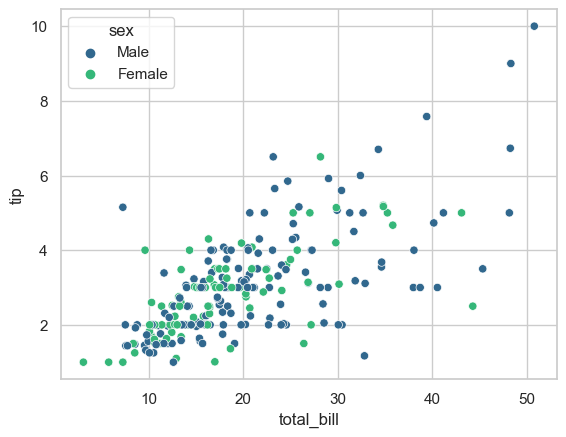

In [61]:
sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex', palette='viridis')
plt.show()

#### Faceting with `FacetGrid`

`Seaborn`’s `FacetGrid` allows you to create a grid of plots based on a categorical variable. This is useful when you want to compare the distributions across different subsets of your data.

- `col`: Creates columns for each level of the day variable.
- `hue`: Differentiates data points within each plot by color based on sex.

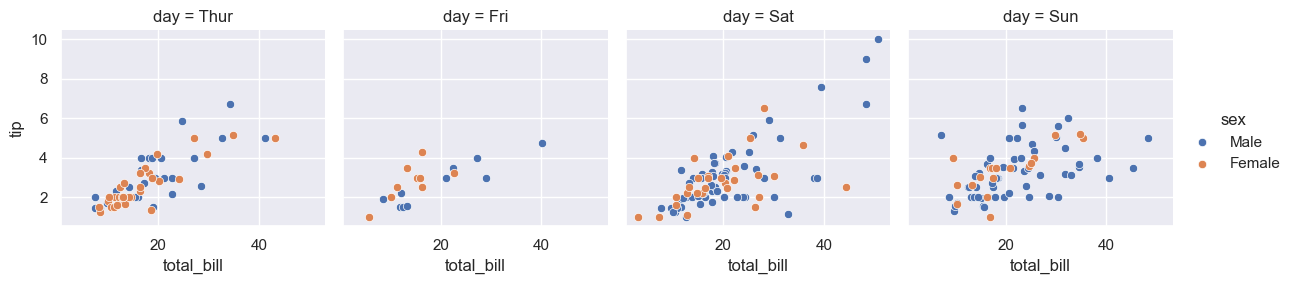

In [45]:
# FacetGrid Example
g = sns.FacetGrid(data, col='day', hue='sex')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

### Customizing the Appearance

Seaborn also makes it easy to control the overall look of your plots:

### Themes: Use `sns.set_theme` to change the overall style.

In [ ]:
sns.set_theme(style='whitegrid')

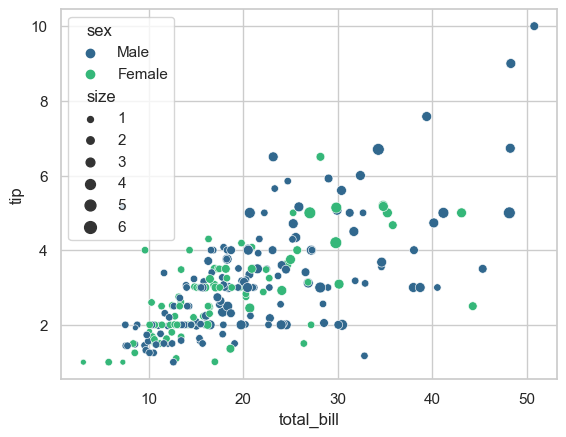

In [66]:
sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex', size='size', palette='viridis')
plt.show()

#### Labels and Titles: Use `Matplotlib` functions for adding titles and labels.

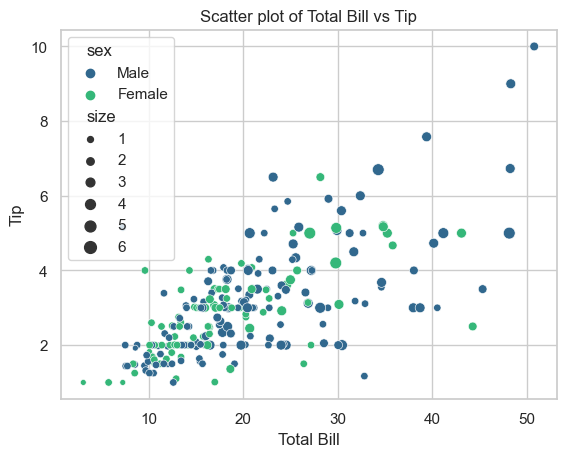

In [65]:
sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex', size='size', palette='viridis')
plt.title('Scatter plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

#### Saving a Plot

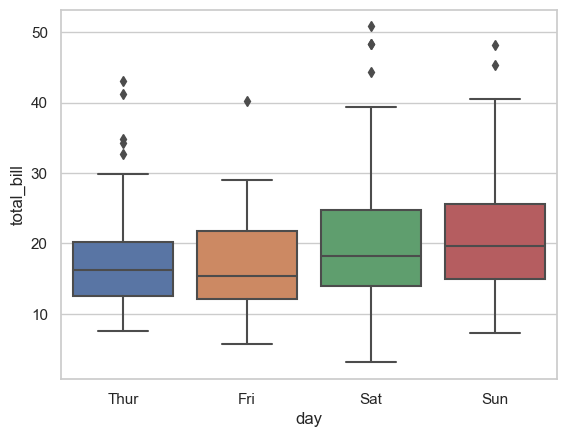

In [67]:
sns.boxplot(data=data, x='day', y='total_bill')
plt.savefig('boxplot.png', dpi=300) # This saves the plot as a high-resolution PNG file.